### Import libs and data

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_ross = pd.read_csv('./dataset/rossmann_store/train.csv', low_memory=False)
df_test = pd.read_csv('./dataset/rossmann_store/test.csv')
df_store = pd.read_csv('./dataset/rossmann_store/store.csv')
df_test_submit = pd.read_csv('./dataset/rossmann_store/sample_submission.csv')

In [4]:
df_train_merge = df_ross.merge(df_store, on='Store', how = 'left') 
df_test_merge = df_test.merge(df_store, on='Store', how = 'left') 

### Cleaning data

In [5]:
df_train_merge.shape

(1017209, 18)

In [6]:
df_train_merge.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"


In [7]:
df_train_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [8]:
round(df_train_merge.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.43,321.91,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,4.00,2.00,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.82,3849.93,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.15,464.41,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.83,0.38,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.38,0.49,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.18,0.38,0.0,0.0,0.0,0.0,1.0
CompetitionDistance,1014567.0,5430.09,7715.32,20.0,710.0,2330.0,6890.0,75860.0
CompetitionOpenSinceMonth,693861.0,7.22,3.21,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,693861.0,2008.69,5.99,1900.0,2006.0,2010.0,2013.0,2015.0


In [9]:
df_train_merge.isna().sum().sort_values(ascending=False)

PromoInterval                508031
Promo2SinceYear              508031
Promo2SinceWeek              508031
CompetitionOpenSinceYear     323348
CompetitionOpenSinceMonth    323348
CompetitionDistance            2642
DayOfWeek                         0
Promo2                            0
Assortment                        0
Store                             0
SchoolHoliday                     0
StateHoliday                      0
Promo                             0
Open                              0
Customers                         0
Sales                             0
Date                              0
StoreType                         0
dtype: int64

In [10]:
df_train_merge.duplicated().sum()

0

In [11]:
df_train_merge['Date'] = df_train_merge['Date'].astype('datetime64[ns]')
df_test_merge['Date'] = df_test_merge['Date'].astype('datetime64[ns]')

In [12]:
df_train_merge['Date'].min(), df_train_merge['Date'].max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [13]:
df_test_merge['Date'].min(), df_test_merge['Date'].max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

Như vậy dữ liệu test là dữ liệu của tương lai so với trong train

### Exploratory data analysis

Mục tiêu của EDA:

- Nghiên cứu distribution của từng cột (uniform, normal, exponential)

- Phát hiện các outliers hoặc errors trong dữ liệu (VD: giá trị bị null/không chính xác)

- Nghiên cứu mối quan hệ của cột mục tiêu với các cột khác (linear, non-linear, v.v.)

- Thu thập insights về vấn đề và tập dữ liệu

- Nảy ra ý tưởng để preprocesing và feature engineering

In [14]:
df_train_merge.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"


<Axes: xlabel='Sales', ylabel='Count'>

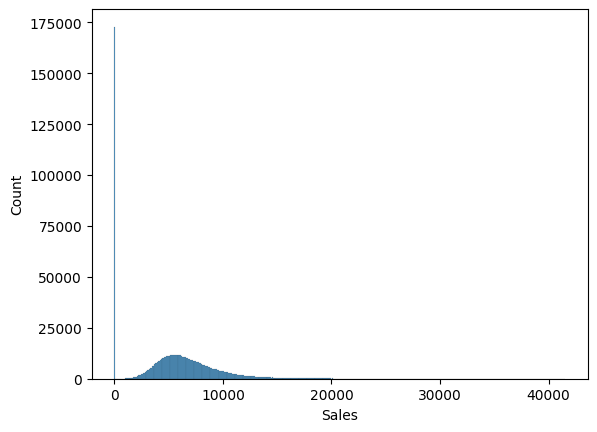

In [15]:
sns.histplot(data=df_train_merge, x='Sales')

Có rất nhiều ngày Sales = 0

<Axes: xlabel='Open', ylabel='count'>

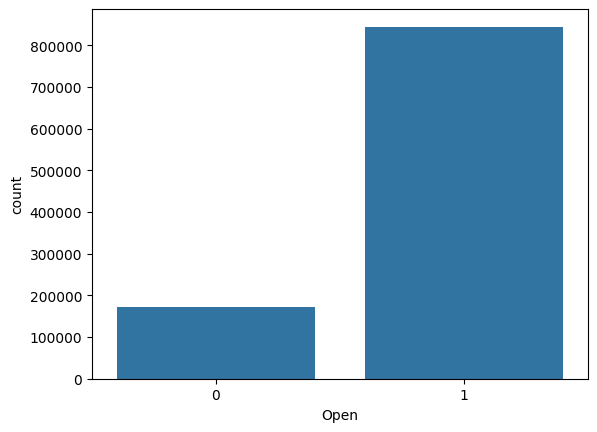

In [16]:
sns.countplot(data=df_train_merge, x='Open')

Điều này có vẻ là do những ngày đó cửa hàng của Open = 0. Kiểm chứng:

In [17]:
df_train_merge['Sales'].value_counts()[0]

172871

In [18]:
df_train_merge['Open'].value_counts()

Open
1    844392
0    172817
Name: count, dtype: int64

Số lượng ngày đóng cửa là 172817 < Số lượng ngày Sales = 0 là 172871. Giả thuyết được kiểm chứng. Vì vậy loại bỏ những ngày không mở cửa hàng để tiến hành làm tiếp.

In [19]:
merged_df = df_train_merge[df_train_merge['Open'] == 1]

<Axes: xlabel='Sales', ylabel='Count'>

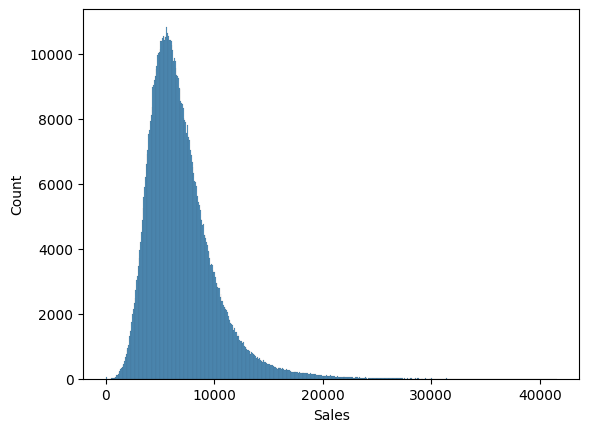

In [20]:
sns.histplot(data=merged_df, x='Sales')

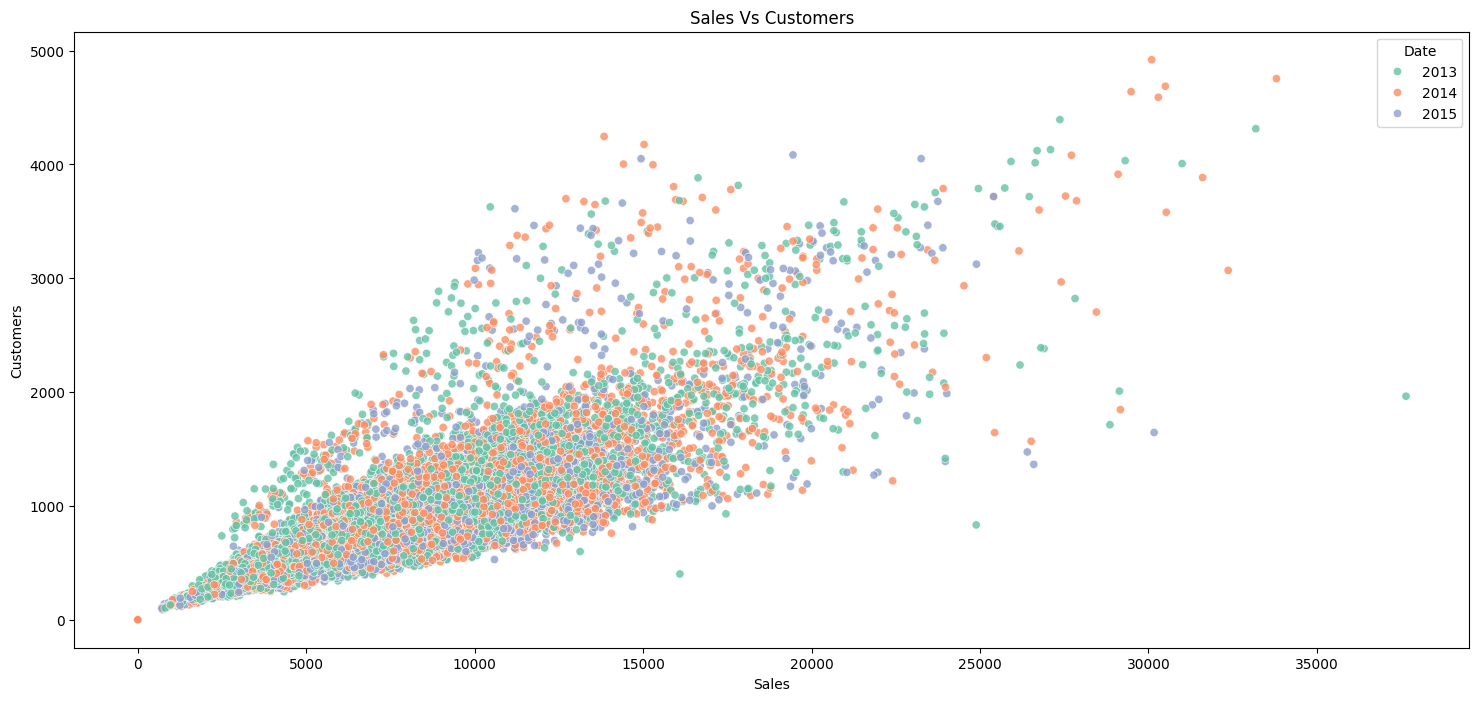

In [34]:
#Tương quan giữa Customers và Sales có khác gì giữa các năm không
plt.figure(figsize=(18,8))
temp_df = merged_df.sample(40000)
sns.scatterplot(data = temp_df
                , x='Sales'
                , y='Customers'
                , hue=temp_df['Date'].dt.year
                , alpha=0.8
                , palette= 'Set2')
plt.title("Sales Vs Customers")
plt.show()

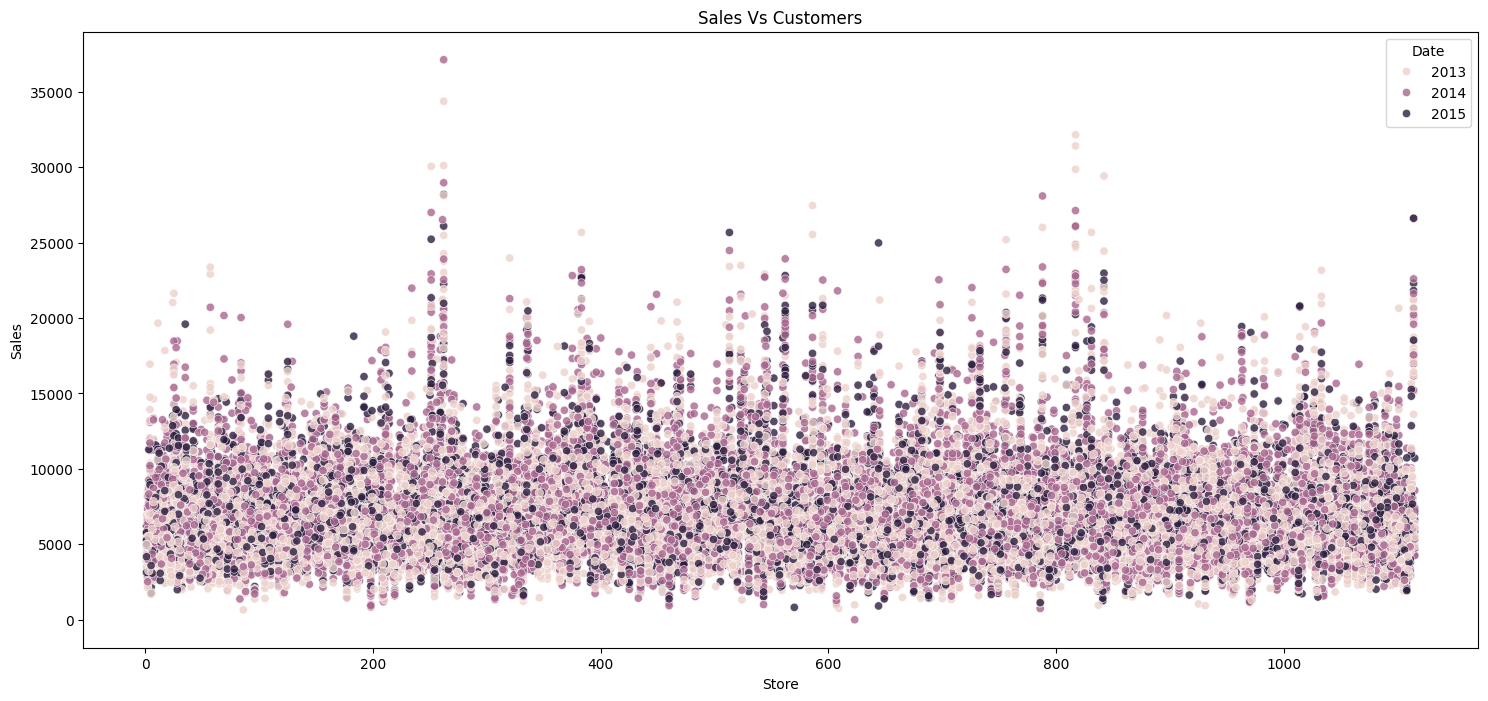

In [35]:
#Tương quan giữa Store và Sales có khác gì giữa các năm không
plt.figure(figsize=(18,8))
temp_df = merged_df.sample(40000)
sns.scatterplot(data = temp_df
                , y='Sales'
                , x='Store'
                , hue=temp_df['Date'].dt.year
                , alpha=0.8
                )
plt.title("Sales Vs Customers")
plt.show()

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

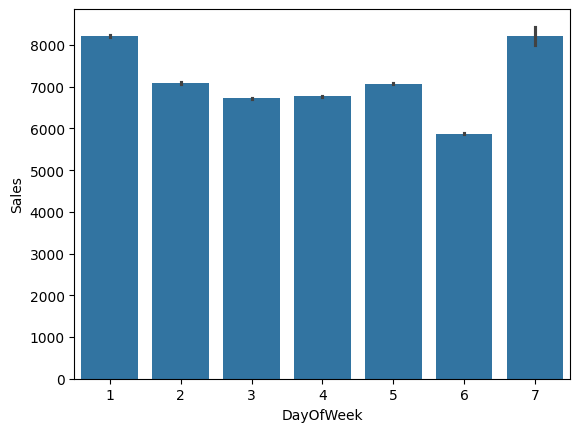

In [36]:
# Khách hàng hay mua vào ngày nào trong tuần
sns.barplot(data=merged_df, x='DayOfWeek', y='Sales')

<Axes: xlabel='Promo', ylabel='Sales'>

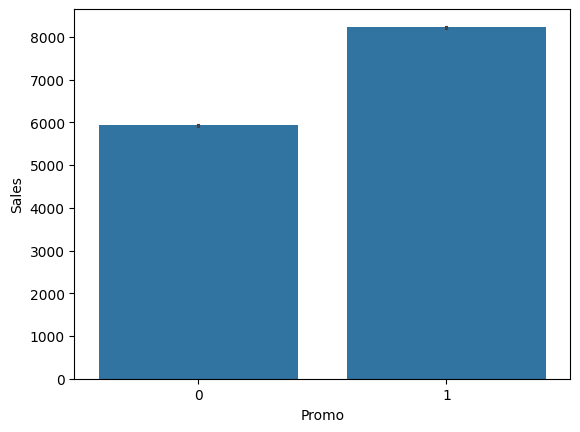

In [37]:
#Promo có ảnh hưởng đến Sales không
sns.barplot(data=merged_df, x='Promo', y='Sales')

In [46]:
# Ma trận Corr của Sales với các biến khác
round(merged_df.corr(numeric_only=True),2)[['Sales']].sort_values(by = 'Sales', ascending=False)

,Sales
Sales,1.00
Customers,0.82
Promo,0.37
Promo2SinceWeek,0.10
SchoolHoliday,0.04
CompetitionOpenSinceYear,0.02
Store,0.01
Promo2SinceYear,-0.03
CompetitionDistance,-0.04
CompetitionOpenSinceMonth,-0.04


### Feature Engineering

Tạo ra thêm các cột mới bằng cách transform/gộp các cột ban đầu hoặc lấy thêm data từ external sources.

Ví dụ: Từ cột 'Date' có thể lấy ra

1. Day of week
2. Day or month
3. Month
4. Year
5. Weekend/Weekday
6. Month/Quarter End

In [47]:
merged_df['Day'] = merged_df.Date.dt.day
merged_df['Month'] = merged_df.Date.dt.month
merged_df['Year'] = merged_df.Date.dt.year

df_test_merge['Day'] = df_test_merge.Date.dt.day
df_test_merge['Month'] = df_test_merge.Date.dt.month
df_test_merge['Year'] = df_test_merge.Date.dt.year

C:\Users\TuNguyen\AppData\Local\Temp\ipykernel_3052\2218892261.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Day'] = merged_df.Date.dt.day
C:\Users\TuNguyen\AppData\Local\Temp\ipykernel_3052\2218892261.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Month'] = merged_df.Date.dt.month
C:\Users\TuNguyen\AppData\Local\Temp\ipykernel_3052\2218892261.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

<Axes: xlabel='Year', ylabel='Sales'>

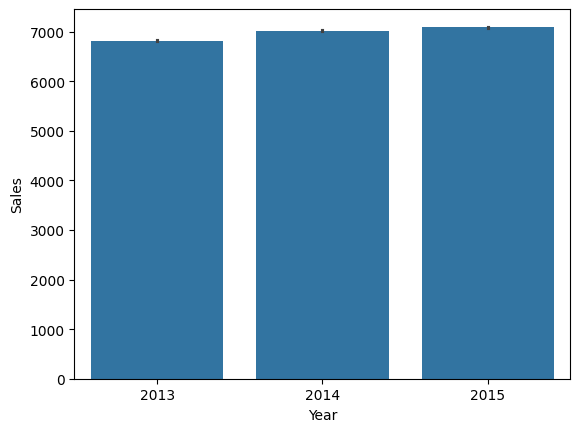

In [48]:
sns.barplot(data=merged_df, x='Year', y='Sales')

<Axes: xlabel='Month', ylabel='Sales'>

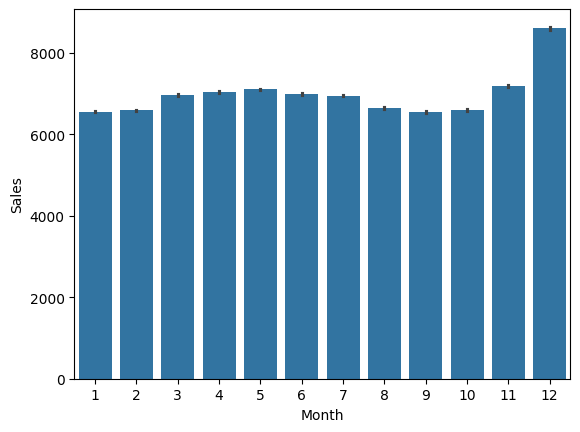

In [49]:
sns.barplot(data=merged_df, x='Month', y='Sales')

Có thể tạo ra thêm các cột như:

1. Weather on each day

2. Whether the date was a public holiday

3. Whether the store was running a promotion on that day.

### Train/Test/Validation Split

In [50]:
len(merged_df)

844392

In [51]:
train_size = int(.75 * len(merged_df))
train_size

633294

In [52]:
sorted_df = merged_df.sort_values('Date')
train_df, val_df = sorted_df[:train_size], sorted_df[train_size:]

In [53]:
len(train_df)

633294

In [54]:
len(val_df)

211098

### Input and Target columns

Chúng ta cũng hãy xác định các cột đầu vào và mục tiêu. 

Lưu ý rằng chúng ta không thể sử dụng số lượng khách hàng làm đầu vào, vì thông tin này không có sẵn trước. 

Ngoài ra, chúng ta không cần sử dụng tất cả các cột có sẵn, chúng ta có thể bắt đầu chỉ với một tập hợp con nhỏ.

In [55]:
input_cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'StoreType', 'Assortment', 'Day', 'Month', 'Year']

In [57]:
target_col = 'Sales'

In [58]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [59]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [60]:
test_inputs = df_test_merge[input_cols].copy()
# test_targets = df_test_merge[target_col].copy() #Tuy nhiên, dataset test không có cột target

In [61]:
numeric_cols = ['Store', 'Day', 'Month', 'Year']
categorical_cols = ['DayOfWeek', 'Promo', 'StateHoliday', 'StoreType', 'Assortment']

### Imputation, Scaling and Encode

- Impute missing values cho cột numeric

- Scale chúng về range $(0 , 1)$

- Encode cột categorical

#### Imputation

In [62]:
from sklearn.impute import SimpleImputer

In [63]:
imputer = SimpleImputer(strategy='mean').fit(train_inputs[numeric_cols])

In [64]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

#### Scaling

In [65]:
from sklearn.preprocessing import MinMaxScaler

In [66]:
scaler = MinMaxScaler().fit(train_inputs[numeric_cols])

In [67]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

#### Encoding

In [68]:
from sklearn.preprocessing import OneHotEncoder

In [75]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(train_inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [78]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

#### Finalize dataset

In [79]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

### Create Baseline model


#### Fixed/Random Guess

Tạo ra 1 baseline model để làm cơ sở so sánh cho các model sau này

In [80]:
# Tạo model luôn return mean()
def return_mean(inputs):
    return np.full(len(inputs), merged_df.Sales.mean())

In [81]:
train_preds = return_mean(X_train)
train_preds

array([6955.51429076, 6955.51429076, 6955.51429076, ..., 6955.51429076,
       6955.51429076, 6955.51429076])

In [86]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error

In [88]:
root_mean_squared_error(train_preds, train_targets)

3082.450443277419

In [89]:
root_mean_squared_error(return_mean(X_val), val_targets)

3168.6033635047716

In [90]:
def guess_random(inputs):
    lo, hi = merged_df.Sales.min(), merged_df.Sales.max()
    return np.random.random(len(inputs)) * (hi - lo) + lo

In [91]:
train_preds = guess_random(X_train)
train_preds

array([   38.3824129 ,   127.01951728,  6309.30082571, ...,
       15140.4422551 , 19575.88879634, 33499.51385053])

In [93]:
root_mean_squared_error(train_preds, train_targets)

18605.70956944943

In [94]:
mean_squared_error(guess_random(X_val), val_targets)

336813371.8236489

Như vậy có thể thấy model random_guess tệ hơn rất nhiều so với return_mean 

#### Baseline ML model

Tạo 1 model `LinearRegression` đơn giản không customize gì

In [95]:
from sklearn.linear_model import LinearRegression

In [99]:
linear_reg = LinearRegression()

In [100]:
linear_reg.fit(X_train, train_targets)

LinearRegression()

In [101]:
train_preds = linear_reg.predict(X_train)
train_preds

array([ 7130., 10603.,  7052., ...,  6247.,  6000.,  5621.])

In [102]:
root_mean_squared_error(train_preds, train_targets)

2741.592530794578

In [103]:
val_preds = linear_reg.predict(X_val)
val_preds

array([5621., 5621., 6001., ..., 8636., 8388., 7827.])

In [104]:
root_mean_squared_error(val_preds, val_targets)

2817.708759490225

### Pick a strategy, train a model & tune hyperparameters

In [109]:
def try_model(model):
    # Fit the model
    model.fit(X_train, train_targets)
    
    # Generate predictions
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    
    # Compute RMSE
    train_rmse = root_mean_squared_error(train_targets, train_preds)
    val_rmse = root_mean_squared_error(val_targets, val_preds)
    return train_rmse, val_rmse

#### Linear Models

In [110]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor

In [111]:
try_model(LinearRegression())

(2741.592530794578, 2817.708759490225)

In [112]:
try_model(Ridge())

(2741.587195081445, 2817.7784665409863)

In [113]:
try_model(Lasso())

(2741.7143904640566, 2817.9472924045217)

In [114]:
try_model(ElasticNet())

(2879.0432103903954, 2972.6658860503385)

In [115]:
try_model(SGDRegressor())

(2742.2426321651537, 2824.341857353364)

#### Tree models

In [116]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [117]:
tree = DecisionTreeRegressor(random_state=42)
try_model(tree)

(0.0, 1559.7378600480247)

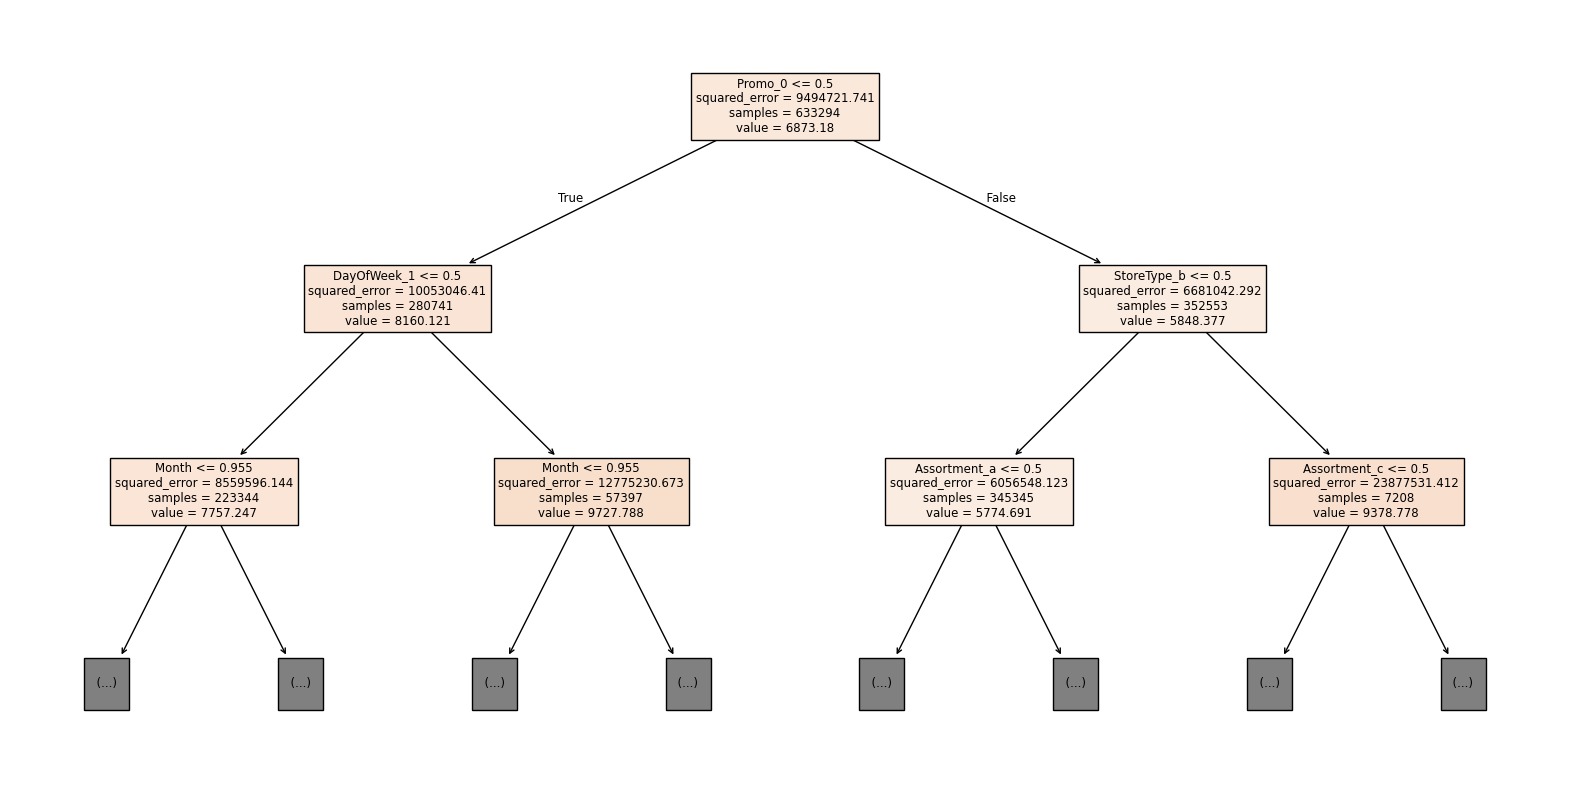

In [121]:
plt.figure(figsize=(20, 10))
plot_tree(tree, max_depth=2, filled=True, feature_names=numeric_cols+encoded_cols);

#### Random Forest

In [122]:
from sklearn.ensemble import RandomForestRegressor

In [123]:
%%time
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
try_model(rf)

CPU times: total: 8min 39s
Wall time: 1min 22s


(474.9198974666898, 1371.7321923469985)

Có thể thấy Random Forest mặc dù chưa tuning đã cho ra kết quả tốt nhất

### Feature Importance

Giải thích tại sao model đưa ra kết quả hiện tại

In [124]:
rf.feature_importances_

array([6.07412101e-01, 4.88393196e-02, 4.71254150e-02, 9.30282826e-03,
       3.36941035e-02, 4.40591456e-03, 2.43735761e-03, 2.11467096e-03,
       5.71418981e-03, 6.96554452e-03, 4.47739863e-03, 5.83469269e-02,
       8.05201285e-02, 1.18767484e-03, 2.11472202e-04, 2.45172539e-05,
       1.88388455e-05, 1.38995265e-02, 2.25678813e-02, 1.04169805e-02,
       1.39945667e-02, 8.34303630e-03, 5.50125164e-03, 1.24783549e-02])

In [125]:
importance_df = pd.DataFrame({ 
    'feature': numeric_cols+encoded_cols, 
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)
importance_df.head(10)

,feature,importance
0,Store,0.607412
12,Promo_1,0.080520
11,Promo_0,0.058347
1,Day,0.048839
2,Month,0.047125
4,DayOfWeek_1,0.033694
18,StoreType_b,0.022568
20,StoreType_d,0.013995
17,StoreType_a,0.013900
23,Assortment_c,0.012478


In [ ]:
importance_df = pd.DataFrame({ 
    'feature': numeric_cols+encoded_cols, 
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)
importance_df.head(10)

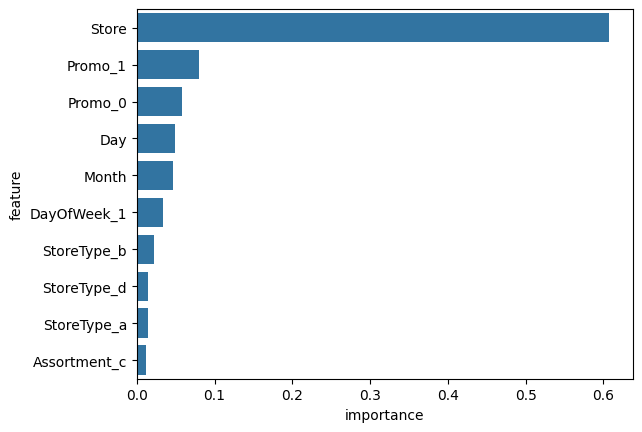

In [126]:
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

Biểu đồ trên có thể được trình bày cho các bên non-tech stakeholders để giải thích cách mô hình đạt được kết quả. 

Để giải thích rõ hơn, có thể sử dụng một cây quyết định duy nhất.

In [128]:
def predict_input(model, single_input):
    if single_input['Open'] == 0:
        return 0.
    input_df = pd.DataFrame([single_input])
    input_df['Date'] = pd.to_datetime(input_df.Date)
    input_df['Day'] = input_df.Date.dt.day
    input_df['Month'] = input_df.Date.dt.month
    input_df['Year'] = input_df.Date.dt.year
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    pred = model.predict(X_input)[0]
    return pred

In [130]:
sample_input = {'Id': 1,
 'Store': 1,
 'DayOfWeek': 4,
 'Date': '2015-09-17 00:00:00',
 'Open': 1.0,
 'Promo': 1,
 'StateHoliday': '0',
 'SchoolHoliday': 0,
 'StoreType': 'c',
 'Assortment': 'a',
 'CompetitionDistance': 1270.0,
 'CompetitionOpenSinceMonth': 9.0,
 'CompetitionOpenSinceYear': 2008.0,
 'Promo2': 0,
 'Promo2SinceWeek': np.nan,
 'Promo2SinceYear': np.nan,
 'PromoInterval': np.nan}

In [131]:
predict_input(rf, sample_input)

4258.01

### Predict test dataset and submit

In [133]:
test_preds = rf.predict(X_test)
test_preds

array([ 4258.01,  7713.83,  8775.7 , ...,  5954.68, 20823.07,  6748.48])

In [132]:
df_test_submit

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0


In [134]:
df_test_submit['Sales'] = test_preds * df_test['Open'].astype('float')

In [136]:
df_test_submit.fillna(0, inplace=True)

In [138]:
df_test_submit.to_csv('./dataset/rossmann_store/submission.csv', index=None)

In [141]:
from IPython.display import FileLink

In [142]:
FileLink('./dataset/rossmann_store/submission.csv')

c:\Users\TuNguyen\Desktop\mygit\my-learning-repo\dataset\rossmann_store\submission.csv